In [1]:
%cd ./..
import sys
from dataset import *
from trainer import Trainer
from ezdict import EZDict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import matplotlib
import pandas as pd
from sklearn.feature_selection import mutual_info_regression as MIR

/media/hdd10tb/yingxic4/SAILER


In [2]:
def get_cmap(n, name='tab10'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(10)

In [3]:
!ls ./data/SimATAC

merge_sim4.npz
merge_sim_labels4.csv
setting2_s0.35_f3000.SCAN-ATAC-Sim_labels.txt
setting2_s0.35_f3000.SCAN-ATAC-Sim.npz
setting2_s0.4_f3000.SCAN-ATAC-Sim_labels.txt
setting2_s0.4_f3000.SCAN-ATAC-Sim.npz
setting2_s0.4_f5000.SCAN-ATAC-Sim_labels.txt
setting2_s0.4_f5000.SCAN-ATAC-Sim.npz


In [4]:
args = EZDict({
    "name": 'sim1_z10',
    'log': 'train_log.csv',
    'load_ckpt': False, 
    'cuda_dev': [2],
    'sample_batch': True,
    "max_epoch": 400,
    'start_epoch': 1,
    'batch_size': 100,
    'start_save': 290,
    'LAMBDA': 1,
    'conv': False,
    'model_type': 'inv',
    'data_type': 'mergeSim',
    'lr': 1e-3, 
    'pos_w': 20,
    'weight_decay': 5e-4,
    'optimizer': 'adam',
    'z_dim': 10,
    'out_every': 5,
    'ckpt_dir': './models/',
    #simATAC
    'setting': 2,
    'signal': 0.4,
    'frags': 5000,
    'bin_size': 10000,
    #ATACbenchmark
    'cov': 1000,
    #batch
    'num':4
})

In [5]:
solver = Trainer(args)

Using cuda
Finish loading in 3.163447141647339, data size (20000, 90635)


In [6]:
solver.warm_up()

100%|██████████| 10/10 [03:57<00:00, 23.72s/it]

[Warmup Finished]


In [7]:
solver.inv_train()

  0%|          | 0/399 [00:00<?, ?it/s]

Inv Training started


400it [3:10:36, 28.59s/it]                           

[Inv Training Finished]


In [8]:
latent, labels, depth = solver.encode_adv()

20it [1:41:10, 303.53s/it]


In [16]:
result = latent.numpy()
reducer = umap.UMAP(random_state=123)
X_embedded = reducer.fit_transform(result)

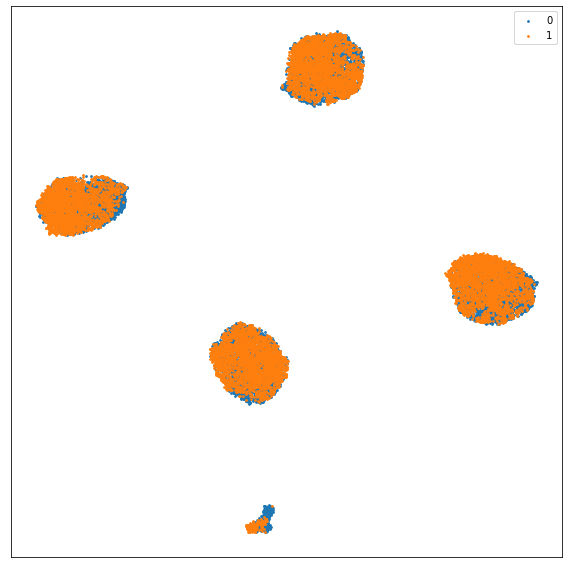

In [23]:
l = np.array(labels)
plt.figure(figsize=(8, 8))
for i, c in enumerate(np.unique(l)):
    mask = (l == c).flatten()
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=c, s=3, color=cmap(i))
    plt.xticks([], [])
    plt.yticks([], [])
plt.tight_layout()
plt.legend()

In [ ]:
mi = MIR(result, l)
print(mi.mean())